# Summer Olympics Assignment

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Summer_Olympics.csv")
data.head(10)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
5,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200M Freestyle,Bronze
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
7,1896,Athens,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200M Freestyle,Silver
8,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400M Freestyle,Bronze
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold


In [5]:
data.shape

(31165, 9)

In [6]:
data.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

# 1. In how many cities Summer Olympics is held ?

In [9]:
ans1 =len(data.City.unique())

print("The total number of cities where Summer Olympics is held :", ans1)

The total number of cities where Summer Olympics is held : 22


# 2.Which sport is having most number of Gold Medals so far?

In [7]:
print("Top 5 sports having most no. of gold medals so far:")
data[data['Medal']=='Gold']['Sport'].value_counts().head()


Top 5 sports having most no. of gold medals so far:


Aquatics      1421
Athletics     1215
Rowing         890
Gymnastics     820
Fencing        552
Name: Sport, dtype: int64

<AxesSubplot:title={'center':'print("Top 5 sports having most no. of gold medals")'}, xlabel='Sport', ylabel='no.of gold medals'>

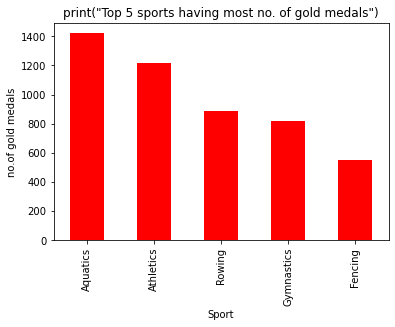

In [28]:
data[data['Medal']=='Gold'].groupby('Sport')['Year'].count().sort_values(ascending = False).head().plot(kind = 'bar', color = 'red', ylabel = 'no.of gold medals', title = 'print("Top 5 sports having most no. of gold medals")')

# 3. Which sport is having most number of medals so far?

In [10]:
print("Top 5 sports having most no. of medals so far:")
data['Sport'].value_counts().head()

Top 5 sports having most no. of medals so far:


Aquatics      4170
Athletics     3638
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Sport, dtype: int64

<AxesSubplot:title={'center':'print("Top 5 sports having most no. of medals so far:")'}, xlabel='Sport', ylabel='no. of medals'>

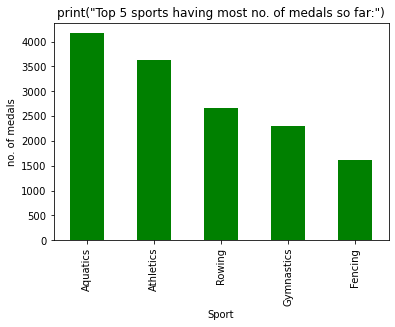

In [29]:
data.groupby('Sport').count()['Medal'].sort_values(ascending = False).head().plot(kind = 'bar',color = 'green',title = 'print("Top 5 sports having most no. of medals so far:")', ylabel = 'no. of medals')

# 4. Which player has won most number of medals? 

In [12]:
print("Top 5 players who won most number of medals:")
data['Athlete'].value_counts().head()

Top 5 players who won most number of medals:


PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
SHAKHLIN, Boris         13
Name: Athlete, dtype: int64

<AxesSubplot:title={'center':'Top 5 players with most number of medals'}, xlabel='Athlete', ylabel='number of medals'>

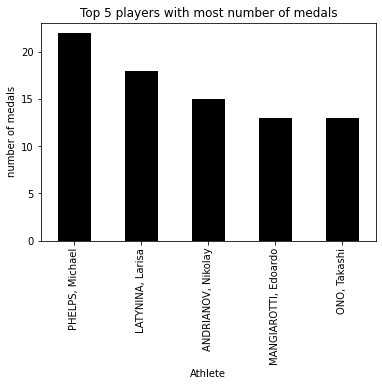

In [32]:
data.groupby('Athlete').count()['Medal'].sort_values(ascending= False).head().plot(kind = 'bar', color = 'black', title = "Top 5 players with most number of medals", ylabel = "number of medals" )

# 5. Which player has won most number Gold Medals of medals?

In [15]:
print("Top 5 players who won most number of gold medals:")
data[data['Medal']=='Gold']['Athlete'].value_counts().head()

Top 5 players who won most number of gold medals:


PHELPS, Michael     18
NURMI, Paavo         9
LEWIS, Carl          9
SPITZ, Mark          9
LATYNINA, Larisa     9
Name: Athlete, dtype: int64

In [18]:
# OR
print("Top 5 players who won most number of medals:")
data[data['Medal']=='Gold'].groupby('Athlete').count()['Medal'].sort_values(ascending= False).head()

Top 5 players who won most number of medals:


Athlete
PHELPS, Michael     18
LEWIS, Carl          9
NURMI, Paavo         9
SPITZ, Mark          9
LATYNINA, Larisa     9
Name: Medal, dtype: int64

<AxesSubplot:title={'center':'Top 5 players with most number of medals'}, xlabel='Athlete', ylabel='number of gold medals'>

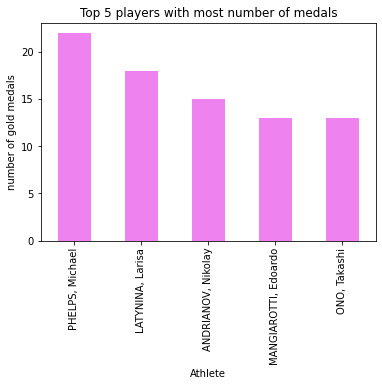

In [33]:
data.groupby('Athlete').count()['Medal'].sort_values(ascending= False).head().plot(kind= 'bar', color = 'violet', title = "Top 5 players with most number of medals", ylabel ="number of gold medals")

# 6. In which year India won first Gold Medal in Summer Olympics?

In [21]:
df = data[data['Country']== 'IND']
ans = df[df['Medal']== 'Gold']['Year'].sort_values(ascending = True).head(1).to_string(index = False)

print("India won its first summer olympic gold medal in year '", ans[:], "'.")


India won its first summer olympic gold medal in year ' 1928 '.


# 7. Which event is most popular in terms on number of players? (Top 5)

In [23]:
df7 = []

for event in data['Event'].unique():
    df_event = data[data['Event']==event]
    unique_athletes = len(df_event['Athlete'].unique())
    df7.append((event, unique_athletes))

# Dataframe with no. of unique Athletes per event: 
df7 = pd.DataFrame(df7, columns = ['Event', 'unique_Athletes'])



In [24]:
ans = df7.sort_values(by ='unique_Athletes', ascending = False).head()
ans = ans.set_index('Event')

print("Top 5 most popular events are:")
ans

Top 5 most popular events are:


,unique_Athletes
Event,
Football,1357
Hockey,1154
Team Competition,975
Eight With Coxswain (8+),828
Basketball,814


<AxesSubplot:title={'center':'Top 5 Most popular events'}, xlabel='Event', ylabel='no. of unique athletes'>

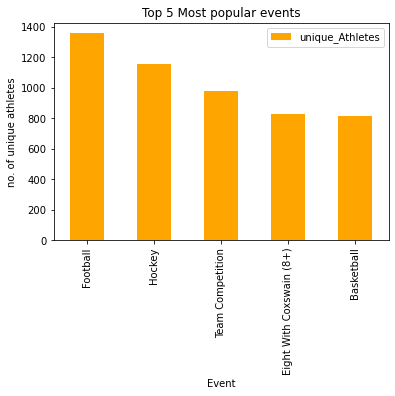

In [35]:
ans.plot(kind = 'bar', color = 'orange', ylabel = "no. of unique athletes", title = "Top 5 Most popular events")

# 8. Which sport is having most female Gold Medalists?   

In [26]:
print("Top 5 sports having most number of female gold medalists:")
df8 =data[data['Gender']=='Women']
df8 = df8[df8['Medal']=='Gold']
df8.head()

df8['Sport'].value_counts().head()

Top 5 sports having most number of female gold medalists:


Aquatics      589
Athletics     389
Gymnastics    268
Rowing        217
Volleyball    166
Name: Sport, dtype: int64

<AxesSubplot:title={'center':'Top 5 sports with most female gold medalists:'}, ylabel=' no. of female gold medalists'>

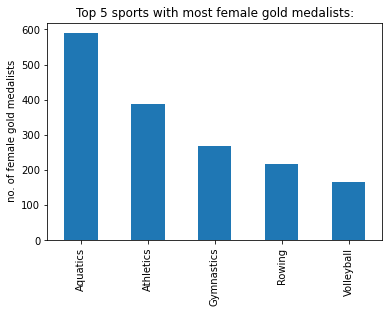

In [27]:
df8['Sport'].value_counts().head().plot(kind = 'bar', title = "Top 5 sports with most female gold medalists:", ylabel =' no. of female gold medalists' )